In [1]:
# get imports
import nuclei
import dsbhelper
import model as modellib
import numpy as np
import random
from matplotlib import pyplot as plt

/Users/farrar/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# define constants
local_train_data_path = 'stage1_train'

In [3]:
# configure the trainer for inference
config = nuclei.InferenceConfig()

In [4]:
# set up the dataset and load validate data
dataset_val = nuclei.NucleiDataset()
dataset_val.load_data(local_train_data_path, mode='validate', filter_ids=dsbhelper.validation_set)
dataset_val.prepare()


In [5]:
# load the model
local_model_folder = './model'
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=local_model_folder)


In [6]:
# load trained weights
model.load_weights('./model/mask_rcnn.h5', by_name=True)

In [62]:
# pick a specimen
image_id = random.choice(dataset_val.image_ids)
#image_id = 1
image_data = dataset_val.get_info(image_id)
print(image_data['specimen_id'])

e5a7b8a9924b26b3abf039255a8a3bb00258f4966f68ff3349560b4350af9367


In [63]:
# get ground truth data
original_image, _, \
class_ids, \
rois,\
masks = modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
print(original_image.shape)
print(masks.shape)

(512, 512, 3)
(512, 512, 20)


In [64]:
# run inference on the same image
p = model.detect([original_image], verbose=1)
prediction = p[0]


Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:   44.00000
molded_images            shape: (1, 512, 512, 3)      min:    0.00000  max:   44.00000
image_metas              shape: (1, 10)               min:    0.00000  max:  512.00000


In [65]:
# get a list of masks that overlap
overlapped_list = dsbhelper.get_overlap_list(prediction['masks'], prediction['rois'])
print(overlapped_list)
                                      

[7, 13, 12, 15]


In [66]:
# find mask pixels with overlap
sum_masks = np.sum(prediction['masks'], axis=2)

# get the rows and columns of each pixel
rows, cols = np.where(sum_masks >= 2)

for i in enumerate(zip(rows, cols)):
    print ('{}:{}'.format(i[0], i[1]))

0:(202, 282)
1:(202, 283)
2:(202, 284)
3:(202, 285)
4:(202, 286)
5:(202, 287)
6:(202, 288)
7:(202, 289)
8:(202, 290)
9:(203, 282)
10:(203, 283)
11:(203, 284)
12:(203, 285)
13:(203, 286)
14:(203, 287)
15:(203, 288)
16:(203, 289)
17:(203, 290)
18:(204, 280)
19:(204, 281)
20:(204, 282)
21:(204, 283)
22:(204, 284)
23:(204, 285)
24:(204, 286)
25:(204, 287)
26:(204, 288)
27:(204, 289)
28:(204, 290)
29:(204, 291)
30:(204, 292)
31:(204, 293)
32:(204, 294)
33:(204, 297)
34:(205, 279)
35:(205, 280)
36:(205, 281)
37:(205, 282)
38:(205, 283)
39:(205, 284)
40:(205, 285)
41:(205, 286)
42:(205, 287)
43:(205, 288)
44:(205, 289)
45:(205, 290)
46:(205, 291)
47:(205, 292)
48:(205, 293)
49:(205, 294)
50:(205, 295)
51:(206, 279)
52:(206, 280)
53:(206, 281)
54:(206, 282)
55:(206, 283)
56:(206, 284)
57:(206, 285)
58:(206, 286)
59:(206, 287)
60:(206, 288)
61:(206, 289)
62:(206, 290)
63:(206, 291)
64:(206, 292)
65:(206, 293)
66:(206, 294)
67:(207, 279)
68:(207, 280)
69:(207, 281)
70:(207, 282)
71:(207, 283)
72

(16, 512, 512)


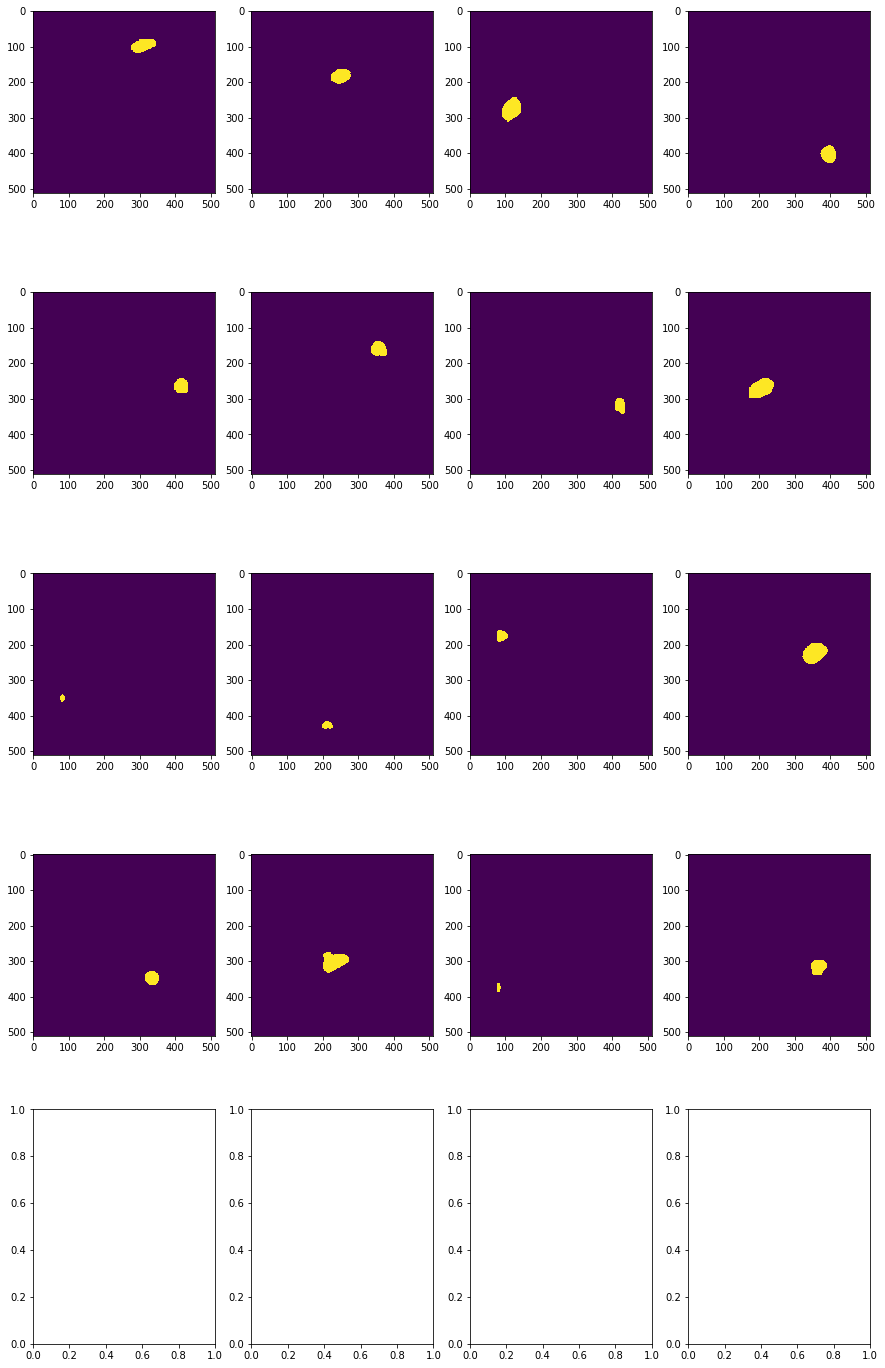

In [67]:
pmasks = np.swapaxes(prediction['masks'], 0, -1)
print(pmasks.shape)
nrows = int(pmasks.shape[0]/4) + 1
fig, axarr = plt.subplots(nrows=nrows, ncols=4, figsize=(15,25))
i = 0

for row in range(nrows):
    for col in range(4):
        if i < pmasks.shape[0]:
            axarr[row, col].imshow(pmasks[i])
        i += 1

score[7]=0.9817922711372375
score[17]=0.7962673306465149
score[15]=0.8131082653999329


IndexError: too many indices for array

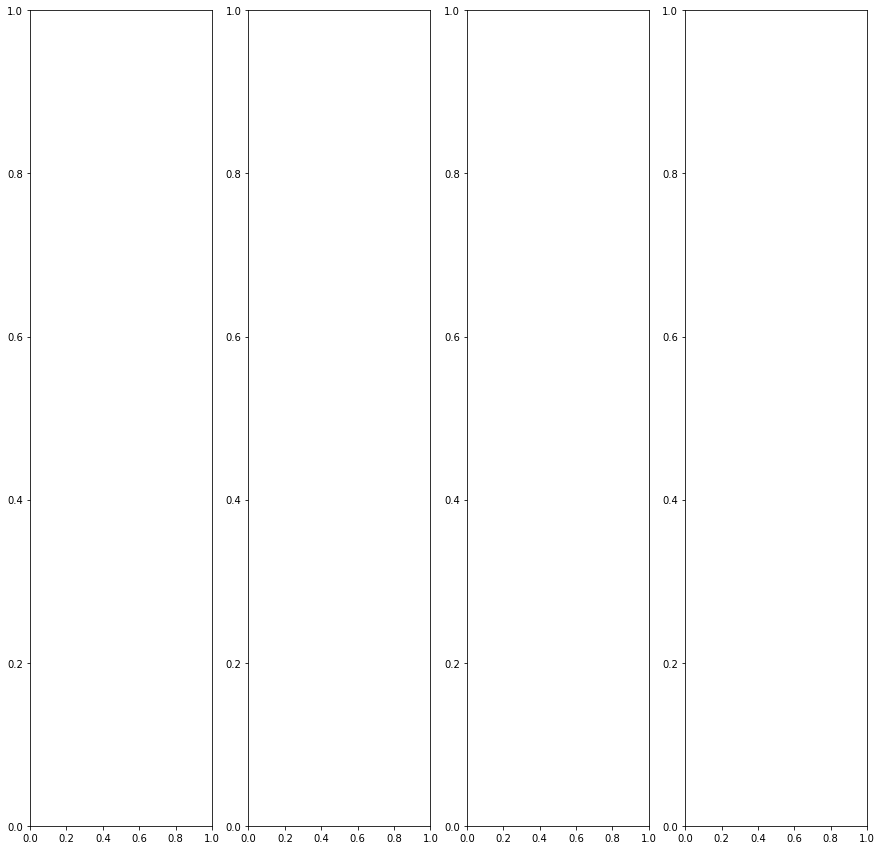

In [49]:
for i in overlapped_list:
    print('score[{}]={}'.format(i, prediction['scores'][i]))

nrows = int(len(overlapped_list)/4) + 1
fig, axarr = plt.subplots(nrows=nrows, ncols=4, figsize=(15,15))

i = 0
for row in range(nrows):
    for col in range(4):
        if i < len(overlapped_list):
            axarr[row, col].imshow(pmasks[overlapped_list[i]])
        i += 1

    
#img = np.zeros((512,512,3), dtype=np.uint8)
#img[:,:,0] = pmasks[7]*255
#img[:,:,1] = pmasks[15]*255
#img[:,:,2] = pmasks[17]*255
#plt.imshow(img)


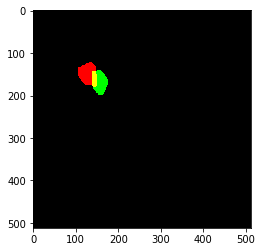

In [57]:
img = np.zeros((512,512,3), dtype=np.uint8)
img[:,:,0] = pmasks[7]*255
img[:,:,1] = pmasks[15]*255
img[:,:,2] = pmasks[17]*0
plt.imshow(img)


In [50]:
revised_masks = dsbhelper.eliminate_overlaps(prediction['masks'], prediction['rois'])

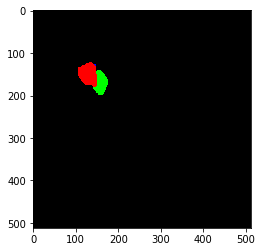

In [52]:
revised_masks = np.swapaxes(revised_masks, 0, -1)
img2 = np.zeros((512,512,3), dtype=np.uint8)
img2[:,:,0] = revised_masks[7]*255
img2[:,:,1] = revised_masks[15]*255
img2[:,:,2] = revised_masks[17]*255
plt.imshow(img2)

(25, 512, 512)


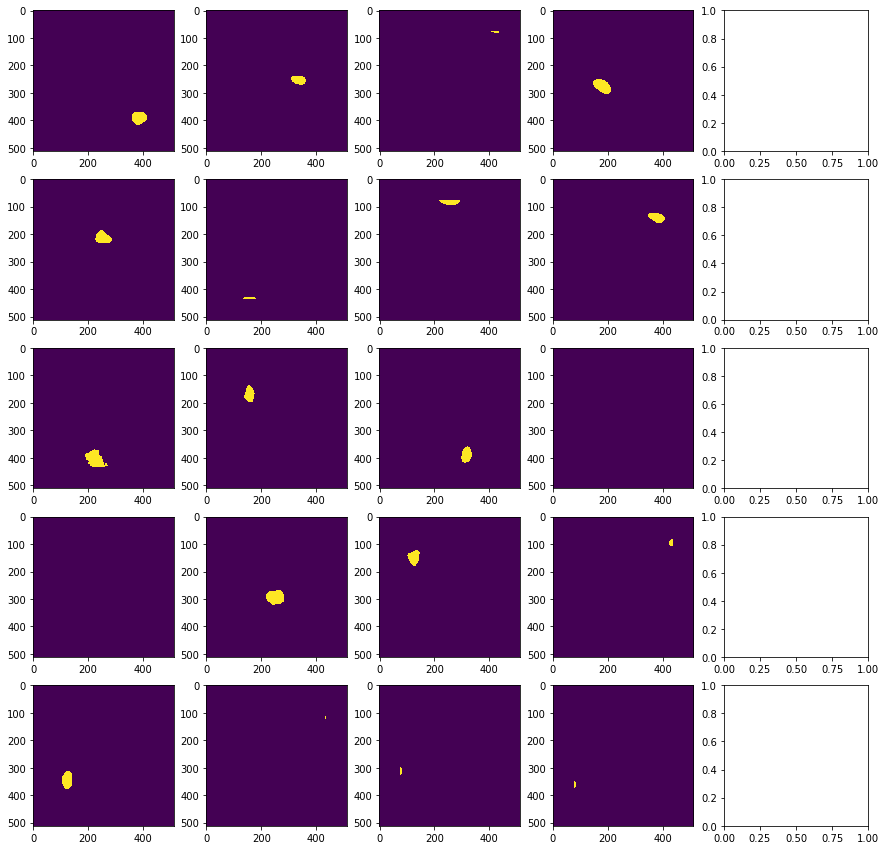

In [53]:
masks = np.swapaxes(masks, 0, -1)
print (masks.shape)
fig, axarr = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
i = 0
for row in range(5):
    for col in range(4):
        axarr[row, col].imshow(masks[i])
        i += 1

In [ ]:
img3 = np.zeros((512,512,3), dtype=np.uint8)
img3[:,:,0] = revised_masks[7]*255
img3[:,:,1] = revised_masks[15]*255
img3[:,:,2] = masks[9]*255

In [ ]:
plt.imshow(img3)

In [ ]:
img4 = np.zeros((512,512,3), dtype=np.uint8)
img4[:,:,0] = revised_masks[7]*255
img4[:,:,1] = revised_masks[15]*0
img4[:,:,2] = masks[14]*255

In [ ]:
plt.imshow(img4)